In [1]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon
import mxnet as mx

num_train = 20
num_test = 100
num_inputs = 200

In [12]:
true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05
(true_w.shape, true_b)

((200, 1), 0.05)

In [3]:
X = nd.random.normal(shape=(num_train + num_test, num_inputs))
y = nd.dot(X, true_w) + true_b
y += .01 * nd.random.normal(shape=y.shape) # normalization

X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

In [7]:
(X_train[0], y_test[0])

(
 [ 0.23107235  0.30030754 -0.32433933  1.04932892  0.73686236 -0.0097888
   0.46656415  1.72023427  0.87809837 -1.07333767 -0.8692565  -0.26717702
  -0.51548833 -1.16747034  0.83952832  0.51638645 -1.26336765 -0.40413618
   1.09088254  0.23103935 -0.9257158  -0.31591919  0.95743537 -0.38919321
  -1.34808254 -0.67003465  1.19365716  1.54496992  0.14451179 -1.8477385
   0.45165458 -0.79649425  0.54254794 -0.1981228  -1.43436348 -1.32349682
  -1.28775203  0.22667837 -0.34295559 -0.24174212  1.62806737 -0.47678864
  -0.17538601  2.40499735  0.47317964 -0.40808728 -0.62635905 -0.251892
   0.61684221 -0.6043455  -1.33544648 -0.3634004  -0.95631856 -2.06976867
   0.26735559 -0.63738728  0.6735397  -1.69787312  0.64833927  0.05638171
   0.79057908 -0.8910743  -0.42496982 -0.4711332  -1.38438404  0.18498535
   0.06093272  0.28702712 -0.82222307  1.16436076 -0.45553163  1.59251416
   0.51759648  0.74979568 -0.66192865  1.21521401 -1.91471267 -0.56540263
   0.35656828  0.51618046 -1.96875072 -0

In [13]:
import random
batch_size = 1
def data_iter(num_examples):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i:min(i+batch_size,num_examples)])
        yield X.take(j), y.take(j)

In [14]:
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    for param in params:
        param.attach_grad()
    return params

In [15]:
def L2_penalty(w, b):
    return ((w**2).sum() + b**2) / 2

In [17]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def net(X, w, b):
    return nd.dot(X, w) + b

def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

def test(net, params, X, y):
    return square_loss(net(X, *params), y).mean().asscalar()
    #return np.mean(square_loss(net(X, *params), y).asnumpy())

def train(lambd):
    epochs = 10
    learning_rate = 0.005
    w, b = params = init_params()
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter(num_train):
            with autograd.record():
                output = net(data, *params)
                loss = square_loss(
                    output, label) + lambd * L2_penalty(*params)
            loss.backward()
            sgd(params, learning_rate, batch_size)
        train_loss.append(test(net, params, X_train, y_train))
        test_loss.append(test(net, params, X_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])
    plt.show()
    return 'learned w[:10]:', w[:10].T, 'learned b:', b

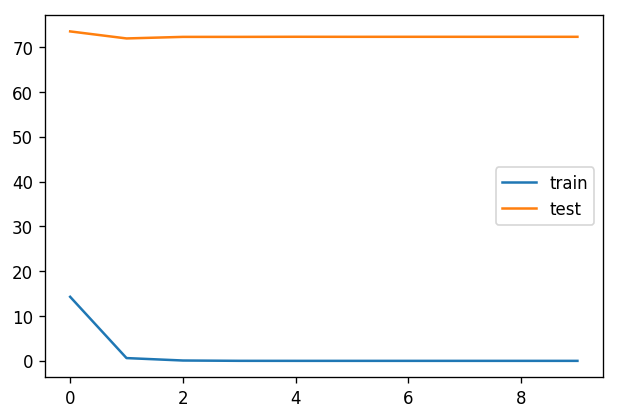

('learned w[:10]:', 
 [[ 0.66353375  0.41483393  0.13900803  0.70560098  0.95132917  0.60463196
   -1.50918972 -0.28548881  0.50638008 -0.93981451]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [-0.31029159]
 <NDArray 1 @cpu(0)>)

In [18]:
train(0)

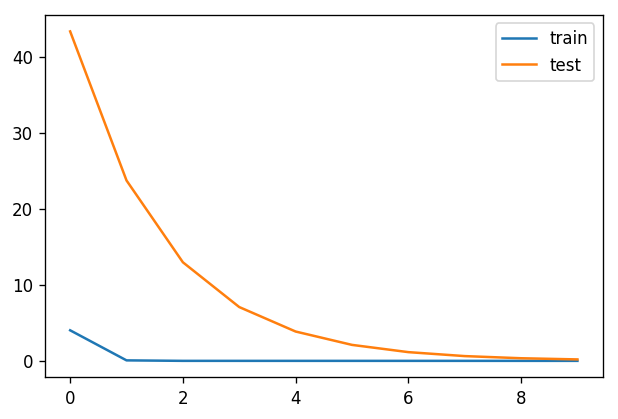

('learned w[:10]:', 
 [[ 0.02177444  0.03771204  0.09530517  0.02081438  0.07162867 -0.0140384
   -0.01690836  0.09721318 -0.07943197  0.01379908]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [ 0.00411705]
 <NDArray 1 @cpu(0)>)

In [19]:
train(3)

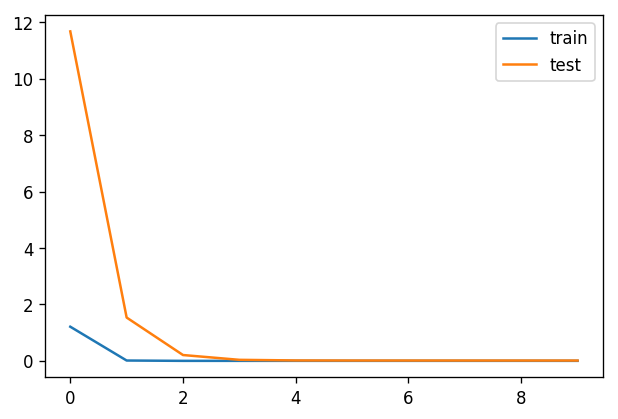

('learned w[:10]:', 
 [[ 0.00256831 -0.00304208  0.00180772 -0.00302035 -0.00328339 -0.0022002
   -0.00094804  0.00229089 -0.00044898  0.00179806]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [ 0.00161046]
 <NDArray 1 @cpu(0)>)

In [20]:
train(10)